# Содержание
1. [Загрузка данных и подготовка к анализу.](#intro)
   * [Вывод](#intro1)
2. [Подготовка функций для расчета и анализа LTV, ROI, удержания и конверсии.](#intro2) 
3. [Проведение исследовательского анализа данных.](#intro3)
4. [Маркетинг.](#intro4)
5. [Оценка окупаемости рекламы для привлечения пользователей.](#intro5)
    * [Вывод и промежуточные рекомендации для рекламного отдела.](#intro6)
6. [Выводы.](#intro7) 

**Цель исследования** - выяснить, почему компания, которая специализируется на развлекательном приложении Procrastinate Pro+, терпит убытки последние несколько месяцев, несмотря на огромные вложения в рекламу.

**Ход исследования:**

Для начала получим данные о визитах, заказах и расходах из файлов `visits_info_short.csv`, `orders_info_short.csv`, `costs_info_short.csv`. О качестве данных ничего не известно. Поэтому перед дальнейшим анализом понадобится обзор данных. 

После того, как все данные будут корректны, приступим к составлению продуктовых и маркетинговых метрик и к исследовательному анализу данных, оценим окупаемость рекламы и изучим, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

# Шаг 1. Загрузка данных и подготовка их к анализу <a id='intro'></a>
 

In [1]:
# импортирование библиотеки pandas
import pandas as pd

# импортирование библиотеки numpy
import numpy as np

# импортирование модуля datetime
from datetime import datetime, timedelta

# импортирование библиотеки matplotlib
from matplotlib import pyplot as plt

In [2]:
# чтение файлов с данными и
# сохранение в переменные visits, orders, costs

visits = pd.read_csv('/datasets/visits_info_short.csv') # данные о посещениях пользователей
orders = pd.read_csv('/datasets/orders_info_short.csv') # покупки
costs = pd.read_csv('/datasets/costs_info_short.csv') # рекламные расходы

## Обзор данных о посещениях пользователей из таблицы `visits`.

In [3]:
# получение первых 5 строк таблицы visits

visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# получение общей информации о данных в таблице visits

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# переименование столбцов в таблице visits

visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [6]:
# преобразование данных о времени
# в таблице visits

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
# получение общей информации о данных в таблице visits

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
# проверка явных дубликатов в таблице visits

visits.duplicated().sum()

0

In [9]:
# просмотр уникальных значений столбца 'region'

visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [10]:
# просмотр уникальных значений столбца 'device'

visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [11]:
# просмотр уникальных значений столбца 'channel'

visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

## Обзор данных о покупках пользователей из таблицы `orders`.

In [12]:
# получение первых 5 строк таблицы orders

orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
# получение общей информации о данных и
# информации об описательных статистических данных 
# в таблице orders

orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [14]:
# переименование столбцов в таблице orders

orders.columns = ['user_id', 'event_dt', 'revenue']

In [15]:
# преобразование данных о времени
# в таблице orders

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [16]:
# проверка явных дубликатов в таблице orders

orders.duplicated().sum()

0

In [17]:
# просмотр уникальных значений столбца 'revenue'

orders['revenue'].unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

In [18]:
# получение общей информации о данных 
# в таблице orders

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


## Обзор данных о рекламных расходах из таблицы `costs`.

In [19]:
# получение первых 5 строк таблицы costs

costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [20]:
# получение общей информации о данных и
# информации об описательных статистических данных 
# в таблице costs

costs.info()
costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [21]:
# переименование столбцов в таблице costs

costs.columns = ['dt', 'channel', 'costs_per_day']

In [22]:
# преобразование данных о времени
# в таблице costs

costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')  

In [23]:
# получение общей информации о данных 
# в таблице costs

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dt             1800 non-null   datetime64[ns]
 1   channel        1800 non-null   object        
 2   costs_per_day  1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [24]:
# проверка явных дубликатов в таблице costs

costs.duplicated().sum()

0

In [25]:
# просмотр уникальных значений столбца 'channel'

costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

**Вывод** <a id='intro1'></a>




Итак, у нас представлено `3` таблицы с данными.

**В `первой` таблице - `visits`, 6 столбцов. У столбцов наблюдается 3 типа данных: `int64`, `object`и `datetime64[ns]`.**

Согласно документации к данным:

* `user_id` — уникальный идентификатор пользователя;
* `region` - страна пользователя;
* `device` — категория устройства пользователя;
* `channel` — идентификатор рекламного источника, из которого пришел пользователь;
* `session_start` — дата и время начала сессии;
* `session_end` — дата и время окончания сессии.

В данной таблице мы:

- привели все названия столбцов к нижнему регистру и добавили нижнее подчеркивание между словами;

- изменили тип данных в столбцах `session_start` и `session_end` на `datetime64[ns]`.



**Во `второй` таблице - `orders`, 3 столбца. У столбцов наблюдается 3 типа данных: `int64`, `float64`и `datetime64[ns]`.**

Согласно документации к данным:

* `user_id` — уникальный id пользователя, который сделал заказ;
* `event_dt` — дата и время покупки;
* `revenue` — выручка.

В данной таблице мы:

- привели все названия столбцов к нижнему регистру и добавили нижнее подчеркивание между словами;

- изменили тип данных в столбце `event_dt` на `datetime64[ns]`.



**В `третьей` таблице - `costs`, 3 столбца. У столбцов наблюдается 3 типа данных: `object`, `float64`и `datetime64[ns]`.**

Согласно документации к данным:

* `dt` — дата;
* `channel` — идентификатор рекламного источника;
* `costs_per_day` — затраты на этот рекламный источник в этот день.

В данной таблице мы:

- привели все названия столбцов к нижнему регистру и добавили нижнее подчеркивание между словами. Столбец `costs` изменили на `costs_per_day`;

- изменили тип данных в столбце `dt` на `datetime64[ns]`.



Также, стоит отметить, что во всех `трёх` таблицах отсутствуют дубликаты в данных и нет пропущенных значений.


# Шаг 2. Подготовка функций для расчета и анализа LTV, ROI, удержания и конверсии <a id='intro2'></a>

**Функции для создания пользовательских профилей, расчёта удержания, конверсии, LTV и ROI**

In [26]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format = '%Y-%m-%d')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs_per_day'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [27]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [28]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [29]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функции для визуализации удержания, конверсии, LTV и ROI**

In [30]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [31]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [32]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [33]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Шаг 3. Проведение исследовательского анализа данных <a id='intro3'></a>

На данном этапе определим минимальную и максимальную дату привлечения пользователей, а также выясним:

- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [34]:
# получение пользовательских профилей 
# с помощью функции get_profiles

profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [35]:
# определение минимальной даты 
# привлечения пользователей

min_analysis_date = profiles['dt'].min()
print('Минимальная дата привлечения пользователей:', min_analysis_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00


In [36]:
# определение максимальной даты 
# привлечения пользователей

max_analysis_date = profiles['dt'].max()
print('Максимальная дата привлечения пользователей:', max_analysis_date)

Максимальная дата привлечения пользователей: 2019-10-27 00:00:00


In [37]:
# создание таблицы region_share, где
# указано количество пользователей и доля платящих из каждой страны

region_share = profiles.pivot_table(index = 'region', values = 'user_id', aggfunc = 'count') 
region_share.rename(columns = {'user_id' : 'count_of_user'}, inplace = True)
region_share['share_payer'] = ((
    profiles.query('payer == True').groupby('region')['user_id'].count() / 
    profiles.groupby('region')['user_id'].count()) * 100).round(2) 
region_share = region_share.sort_values(by = 'share_payer', ascending = False).style.format({'share_payer' : '{:.2f}%'})
display(region_share)

,count_of_user,share_payer
region,,
United States,100002,6.90%
Germany,14981,4.11%
UK,17575,3.98%
France,17450,3.80%


По таблице `region_share` мы видим, больше всего платящих пользователей приходится из `США`. Общее количество пользователей составляет - `100 002`, а доля `6.90`. 

Доля платящих пользователей из `Германии, Великобритании и Франции` примерно одинакова - `4.11`, `3.98` и `3.80` соответственно.

Самое последнее место по общему количеству составляют пользователи из `Германии`, однако по доле платящих, `4.11`, они занимают второе место после `США` .

In [38]:
# создание таблицы device_share, где
# указано количество пользователей и доля платящих для каждого устройства

device_share = profiles.pivot_table(index = 'device', values = 'user_id', aggfunc = 'count') 
device_share.rename(columns = {'user_id' : 'count_of_user'}, inplace = True)
device_share['share_payer'] = ((
    profiles.query('payer == True').groupby('device')['user_id'].count() / 
    profiles.groupby('device')['user_id'].count()) * 100).round(2) 
device_share = device_share.sort_values(by = 'share_payer', ascending = False).style.format({'share_payer' : '{:.2f}%'})
display(device_share)

,count_of_user,share_payer
device,,
Mac,30042,6.36%
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%


Согласно данным из таблицы `device_share` платящие пользователи больше всего предпочитают пользоваться `Mac`, доля составляет `6.36`, на втором месте `iPhone` - доля `6.21`. Меньше всего платящие пользователи используют `PC` - доля `5.05`.

По общему количеству пользователей больше всего популярны `iPhone` - `54 479` и `Android` - `35 032`.

In [39]:
# создание таблицы channel_share, где
# указано количество пользователей и доля платящих 
# для каждого канала привлечения

channel_share = profiles.pivot_table(index = 'channel', values = 'user_id', aggfunc = 'count') 
channel_share.rename(columns = {'user_id' : 'count_of_user'}, inplace = True)
channel_share['share_payer'] = (
    profiles.query('payer == True').groupby('channel')['user_id'].count() / 
    profiles.groupby('channel')['user_id'].count()) * 100
channel_share = channel_share.sort_values(by = 'share_payer', ascending = False).style.format({'share_payer' : '{:.2f}%'})
display(channel_share)

,count_of_user,share_payer
channel,,
FaceBoom,29144,12.20%
AdNonSense,3880,11.34%
lambdaMediaAds,2149,10.47%
TipTop,19561,9.60%
RocketSuperAds,4448,7.91%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%
MediaTornado,4364,3.57%
LeapBob,8553,3.06%


По таблице `channel_share` мы видим, больше всего платящих пользователей пришло из канала `FaceBoom`. Общее количество пользователей составляет - `29 144`, а доля `12.20`. 

Также доля платящих пользователей больше у каналов `AnNonSense` - `11.34` и `lambdaMediaAds` - `10.47`.

Однако, стоит заметить, что, по общему количеству пользователей - `19 561`, канал `TipTop` занимает второе место, однако, по доле платящих -  `9.60`, он на четвёртом месте.

# Шаг 4. Маркетинг <a id='intro4'></a>

На данном шаге выясним:
- Сколько денег потратили на маркетинг? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [40]:
# подсчёт общей суммы расходов на маркетинг
# по столбцу 'costs_per_day'

print('Общая сумма расходов на маркетинг составляет:', costs['costs_per_day'].sum().round(2))

Общая сумма расходов на маркетинг составляет: 105497.3


In [41]:
# получение таблицы, где
# суммы расходов на маркетинг
# распределены по каналам привлечения

costs.groupby('channel').agg(
    {'costs_per_day' : 'sum'}).sort_values(by = 'costs_per_day', ascending = False).reset_index().rename(
    columns = {'costs_per_day' : 'total_costs'})

,channel,total_costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


По таблице мы видим, что самые большие затраты на маркетинг были через канал `TipTop`, стоимость составляет - `54 751.30`.

Самые меньшие затраты были через каналы `MediaTornado` - `954.48` и `YRabbit` - `944.22`.

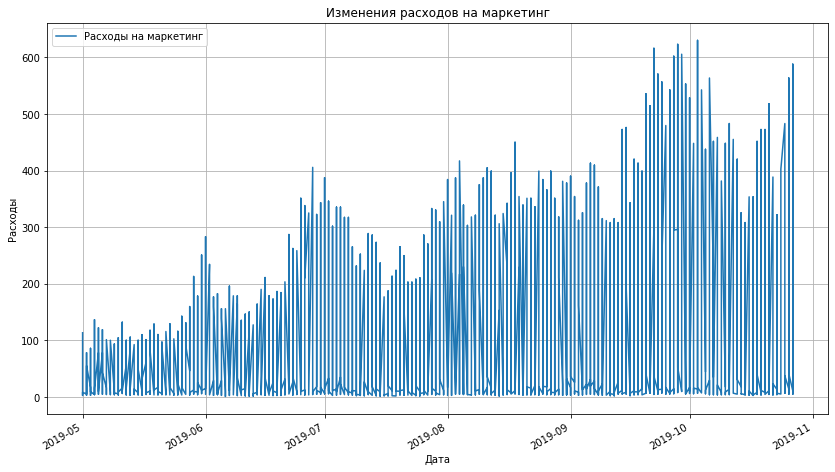

In [42]:
# построение графика  
# по таблице costs

costs.plot(x = 'dt', y = 'costs_per_day', grid = True, figsize = (14, 8), label = 'Расходы на маркетинг')
plt.title('Изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

In [43]:
# получение среза данных
# по таблице costs

costs.query('costs_per_day >= 600')

,dt,channel,costs_per_day
684,2019-09-22,TipTop,616.0
689,2019-09-27,TipTop,602.0
690,2019-09-28,TipTop,623.0
691,2019-09-29,TipTop,605.5
695,2019-10-03,TipTop,630.0


По графику и по срезу данных мы видим, что самые большие затраты на маркетинг были `3 октября`, сумма составляет - `630` и `28 сентября` - `623`.

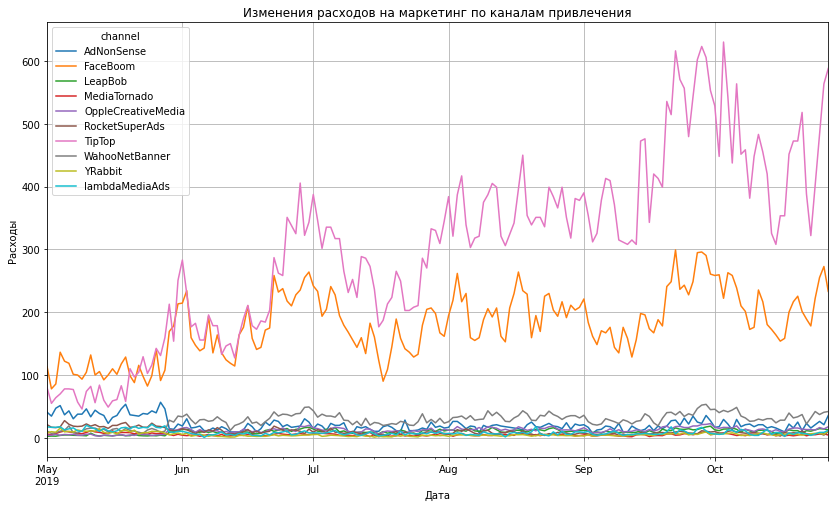

In [44]:
# построение графика  
# по таблице costs

costs.pivot_table(
    index = 'dt', columns = 'channel', values = 'costs_per_day', aggfunc = 'sum').plot(grid = True, figsize = (14,8))
plt.title('Изменения расходов на маркетинг по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

По графику мы также видим, что самые большие затраты на маркетинг были через каналы `TipTop` и `FaceBoom`. 

Через канал `TipTop` в `октябре` увеличились затраты и достигли более `600` у.е. Также мы видим, что затраты через данный канал с каждый месяцем поднимаются.

Через канал `FaceBoom` затраты на протяжении всего периода держатся в районе от `100` до `300` у.е. Что примечательно самая высокая цена у данного канала была также в `октябре`.

Через остальные каналы затраты на маркетинг были меньше всего. Однако, по графику не совсем понятна их динамика. Поэтому рассмотрим их поближе на следующем графике.

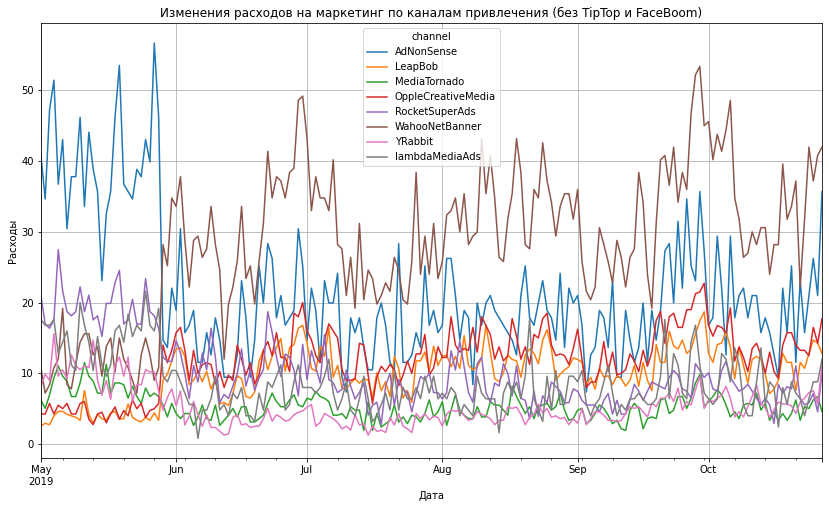

In [45]:
# построение графика  
# по таблице costs

costs.query('channel != "TipTop" and channel != "FaceBoom"').pivot_table(
    index = 'dt', columns = 'channel', values = 'costs_per_day', aggfunc = 'sum').plot(grid = True, figsize = (14,8))
plt.title('Изменения расходов на маркетинг по каналам привлечения (без TipTop и FaceBoom)')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

Самые меньшие затраты были через каналы `YRabbit` и `MediaTornado`, а самые большие затраты в данной категории у `WahooNetBanner`, далее идёт `AdNonSense`. 

Стоит заметить, что у канала `WahooNetBanner` примерно одинаковая стоимость на протяжении всего периода, от `20` до `45` у.е., а у `AdNonSense` с `мая` по `июнь` были резкие подъемы цен, доходящие до `55` у.е., учитывая, что стандартные затраты через них держатся от `10` до `30` у.е.

In [46]:
# получение среднего CAC на одного пользователя
# по столбцу 'acquisition_cost'

print('Средняя стоимость привлечения клиента на одного пользователя составляет', profiles['acquisition_cost'].mean().round(2))

Средняя стоимость привлечения клиента на одного пользователя составляет 0.7


In [47]:
# получение среднего CAC на одного пользователя
# по столбцу 'acquisition_cost'
# с разбивкой по каналам привлечения

profiles.groupby('channel').agg({'acquisition_cost' : 'mean'}).round(2).sort_values(
    by = 'acquisition_cost', ascending = False).reset_index().rename(columns = {'acquisition_cost' : 'acquisition_cost_mean'}) 

,channel,acquisition_cost_mean
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,MediaTornado,0.22
8,YRabbit,0.22
9,LeapBob,0.21


Самые догогие каналы по средней стоимости привлечения клиента на одного пользователя это `TipTop` - `2.80`, `FaceBoom` - `1.11` и `AdNonSense` - `1.01`.

Меньше всего средняя стоимость у каналов `LeapBob` - `0.21`, `YRabbit` - `0.22` и `MediaTornado` - `0.22`.

# Шаг 5. Оценка окупаемости рекламы для привлечения пользователей <a id='intro5'></a>
 

На данном этапе с помощью LTV, CAC и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по устройствам.

Также ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Для этого изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишим возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела.  

In [48]:
# определение момента и горизонта анализа

observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14 # горизонт анализа

In [49]:
# создание таблицы без 
# пользователей с органическим трафиком

profiles = profiles.query('channel != "organic"')

### Анализ общей окупаемость рекламы

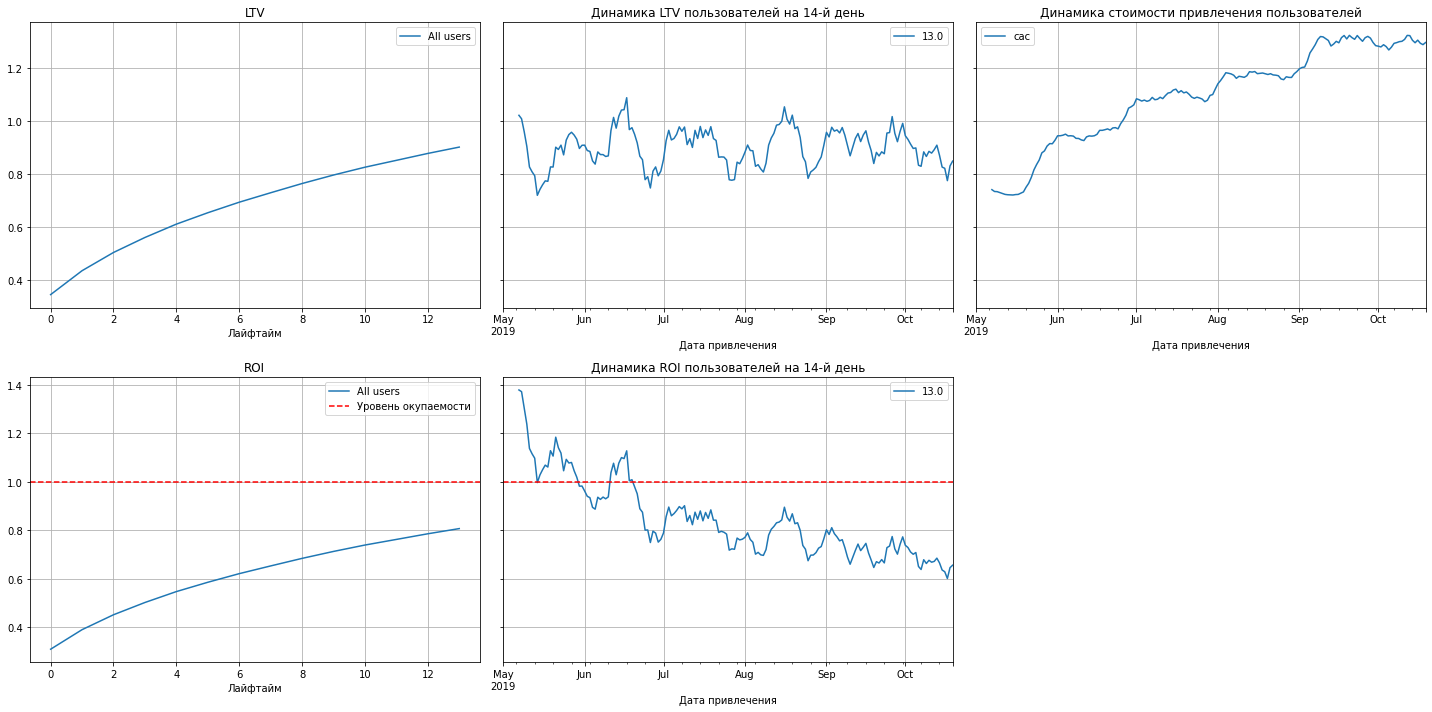

In [50]:
# построение графиков LTV, ROI и
# графиков динамики LTV, CAC и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По представленным графикам мы видим, что:

- `LTV` («пожизненная ценность» клиента) достаточно стабилен, значит качество пользователей не ухудшается. Однако, сезонный фактор оказывает на него небольшое влияние, так как есть колебания на `14-й день` на протяжении всего временного периода;


- `CAC` (стоимость привлечения одного клиента) растёт, следовательно затраты на рекламу увеличиваются на протяжении времени;


- `ROI` (окупаемость инвестиций) не превышает красной черты уровня окупаемости, значит реклама не окупается ближе ко 2-ой недели;


- `ROI пользователей` на 14-ый день также постепенно снижается до `0.6`. Однако, приблизительно до `июля` показатель был выше уровня окупаемости, но после стал опускаться.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

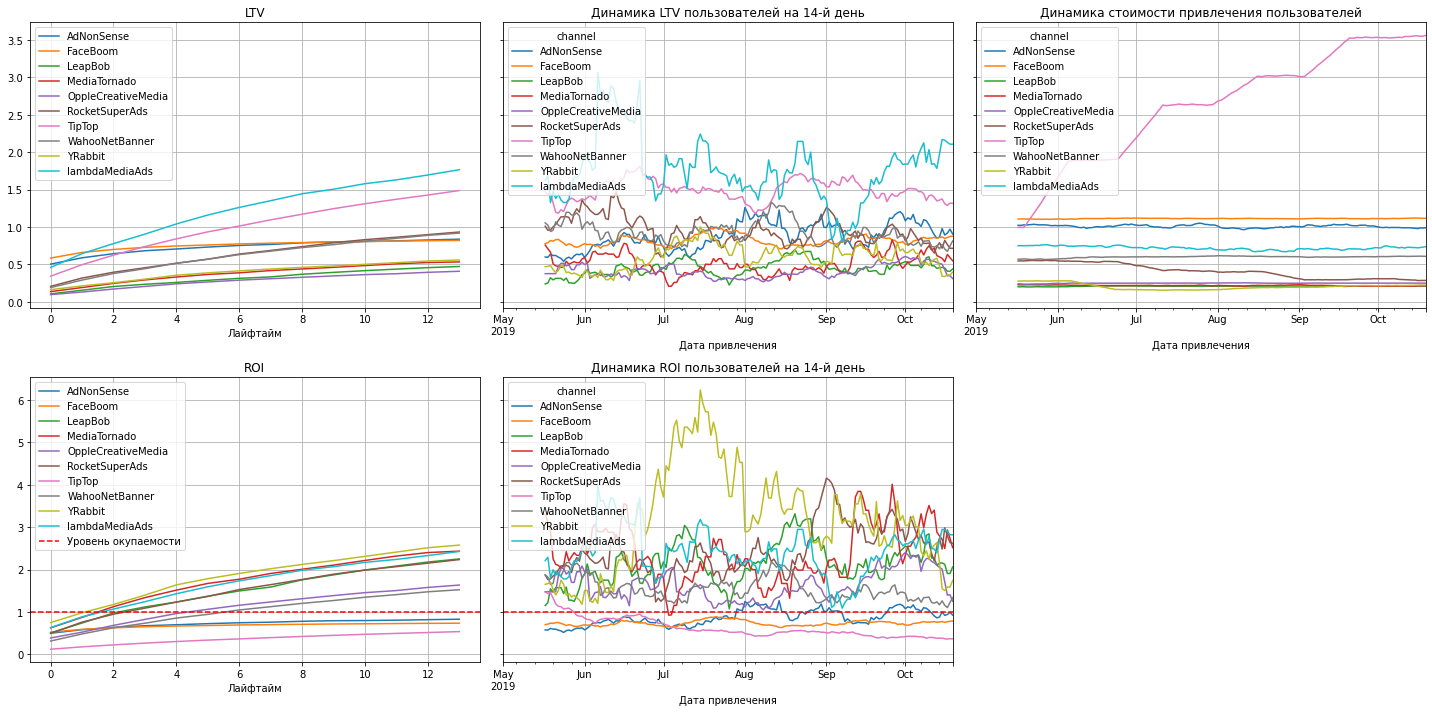

In [51]:
# построение графиков LTV, ROI и
# графиков динамики LTV, CAC и ROI 
# с разбивкой по рекламным каналам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 17)

По представленным графикам можно сделать следующие выводы:

- На рекламный канал `TipTop` было потрачено много средств, так как стоимость привлечения пользователей с каждым месяцем растёт. Однако, вложенные средства в рекламу по данному каналу не принесли успехов, окупаемость не достигла должного уровня;


- Реклама, потраченная на привлечение пользователей из рекламных каналов `TipTop`, `FaceBoom`, `LeapBob`, не окупилась;


- По рекламному каналу `YRabbit` в `июле` месяце был высокий подъём, окупаемость пользователей на `14-ый` день была высокой. Также, примерно на протяжении всего периода показатели данного рекламного канала оставались на уровне.

### Анализ окупаемости рекламы с разбивкой по странам

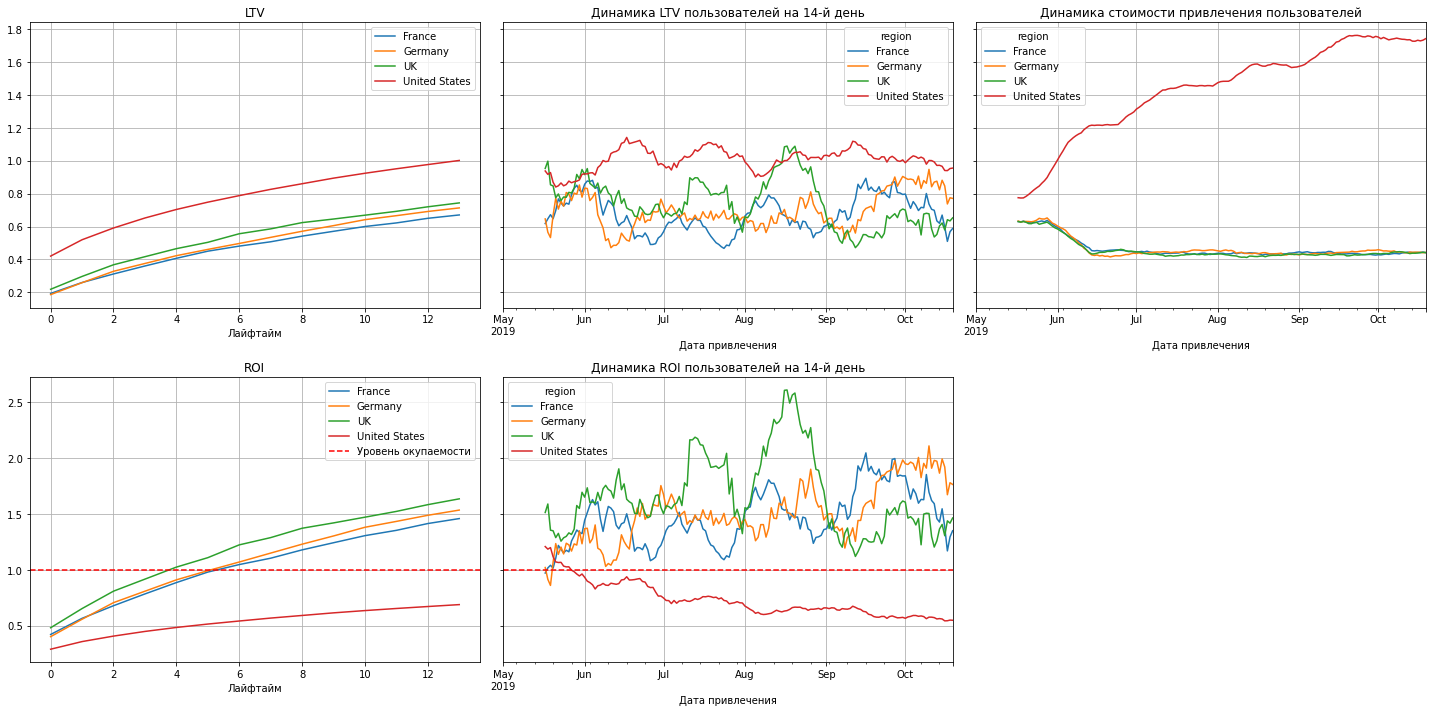

In [52]:
# построение графиков LTV, ROI и
# графиков динамики LTV, CAC и ROI 
# с разбивкой по странам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['region'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 17)

По графикам мы видим, что:

- Стоимость привлечения пользователей из `США` самая высокая, `CAC` растёт на протяжении всего времени. Однако, потраченные средства на привлечение пользователей из данной страны не дают должного результата, окупаемость не превышает определённой отметки;


- Всех лучше окупается реклама на привлечение пользователей из `Великобритании` и `Германии`;


- Окупаемость пользователей из `США` начала падать с `конца июля`. Можно предположить, что на это могли повлиять какие то внутренние изменения в продукте, неудачный релиз или запуск похожего продукта у конкурентов.

### Анализ окупаемости рекламы с разбивкой по устройствам

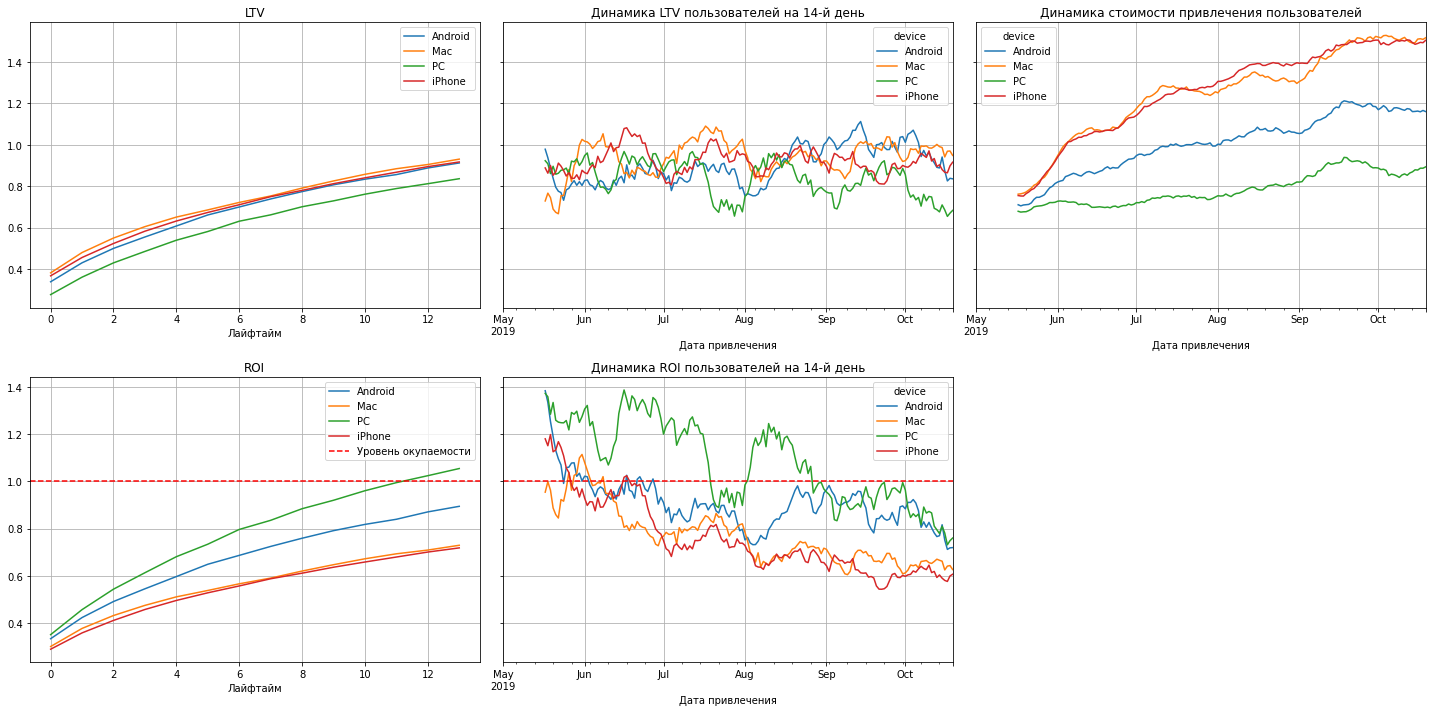

In [53]:
# построение графиков LTV, ROI и
# графиков динамики LTV, CAC и ROI 
# с разбивкой по устройствам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 17)

По представленным результатам на графиках мы видим, что:

- Стоимость привлечения пользователей по всем устройствам растёт с каждым месяцем. Дороже всех стоимость привлечения пользователей `Mac` и `iPhone`, дешевле всех - пользователей `PC`;


- Затраты на привлечение пользователей `PC` ниже всех, однако только у них общая окупаемость инвестиций выше опредлённой отметки;


- Окупаемость на 14-й день для пользователей всех устройств была на должном уровне до `июня` месяца, после показатели стали снижаться, особенно для пользователей устройств `Mac` и `iPhone`;


- Окупаемость для пользователей устройств `PC`, начиная с `сентября` месяца была ниже определённой отметки, хоть и общий уровень окупаемости на протяжении всех 2-х недель по данному устройству оставался на должном уровне. Также был резкий скачок вниз в плане окупаемости с `конца июля` по `начало августа`. По показателям `LTV` («пожизненная ценность» клиента) тоже наблюдается резкий спад в данный период.

### Изучение графиков конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

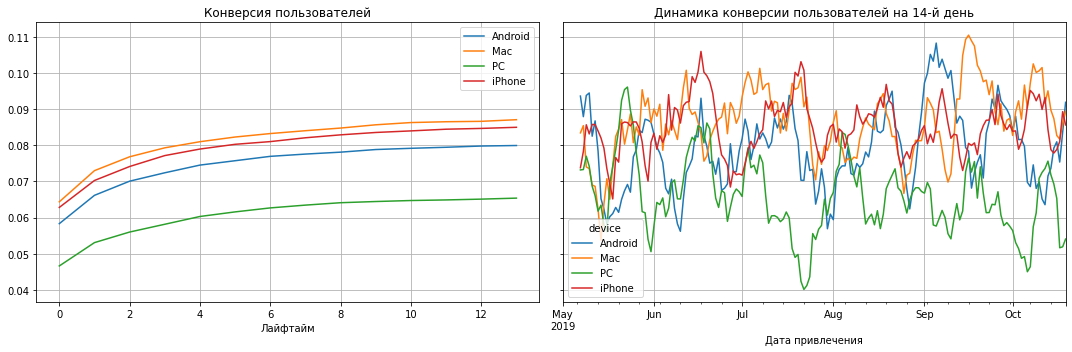

In [54]:
# построение графиков конверсии
# с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['device'])
  

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 7)

Исходя из представленных графиков:

- Конверсия пользователей `Mac`, `iPhone` и `Android` достаточно высокая и без каких то колебаний;


- Конверсия пользователей `PC` на 14-й день с `середины июля` по `конец июля` резко падает. Ранее по показателям LTV («пожизненная ценность» клиента) и ROI (окупаемость инвестиций) мы также заметили подобную закономерность на 14-й день в примерное время. 

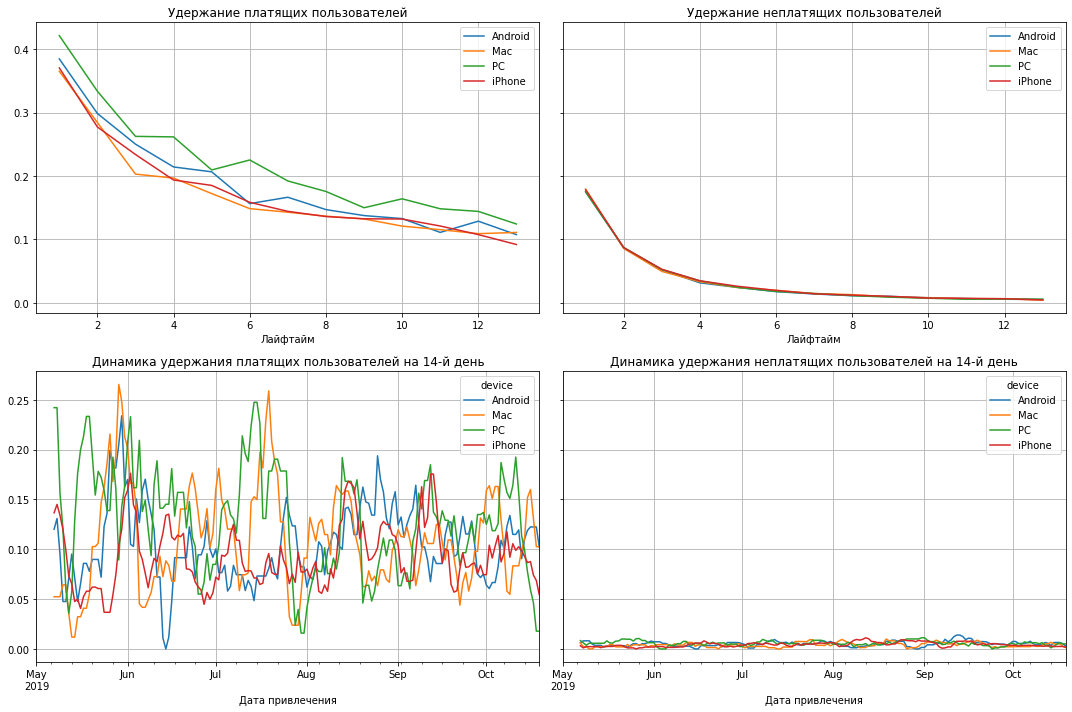

In [55]:
# построение графиков удержания
# с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['device'])
  

plot_retention(retention_grouped, retention_history, horizon_days, window = 7)

По представленным графикам можно сказать, что:

- Пользователи всех устройств удерживаются примерно одинаково, нет каких то явных лидеров или отстающих;


- Неплатящие пользователи удерживаются плохо и хуже, чем платящие пользователи;


- Из платящих пользователей лучше всего удерживаются владельцы `PC`, хуже всего владельцы `iPhone` и `Mac`.

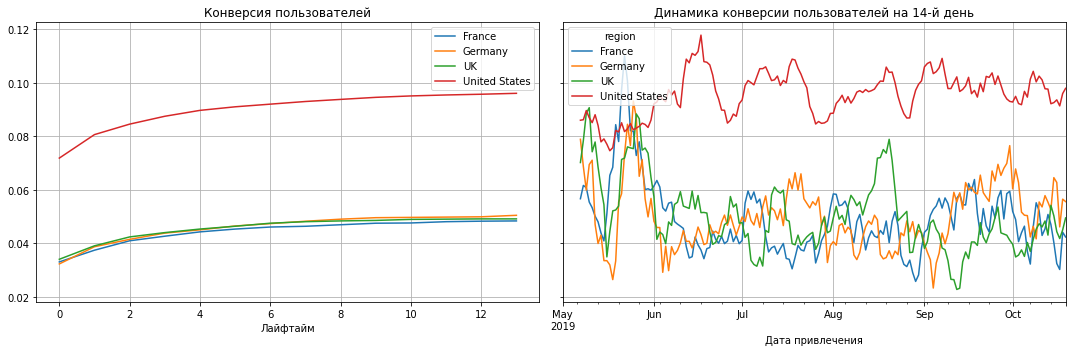

In [56]:
# построение графиков конверсии
# с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['region'])
  

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 7)

По графикам мы видим, что самая высокая конверсия у пользователей из `США`, а самая низкая конверсия у пользователей из `Великобритании`, `Германии` и `Франции`.

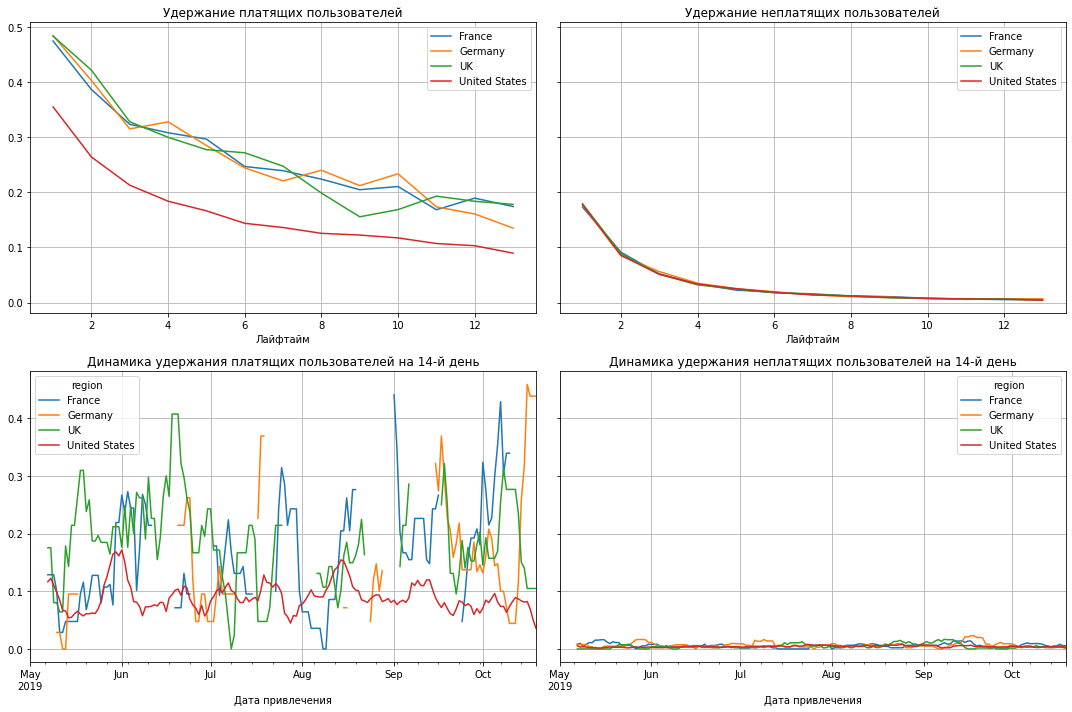

In [57]:
# построение графиков удержания
# с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['region'])
  

plot_retention(retention_grouped, retention_history, horizon_days, window = 7)

- Удержание платящих пользователей из `США` стабильно низкое, сезонный фактор также не влияет. Удержание платящих пользователей из других стран примерно одинаковое;


- Также, как и с разбивкой пользователей по устройствам, удержание неплатящих пользователей очень низкое и намного хуже, чем платящих.

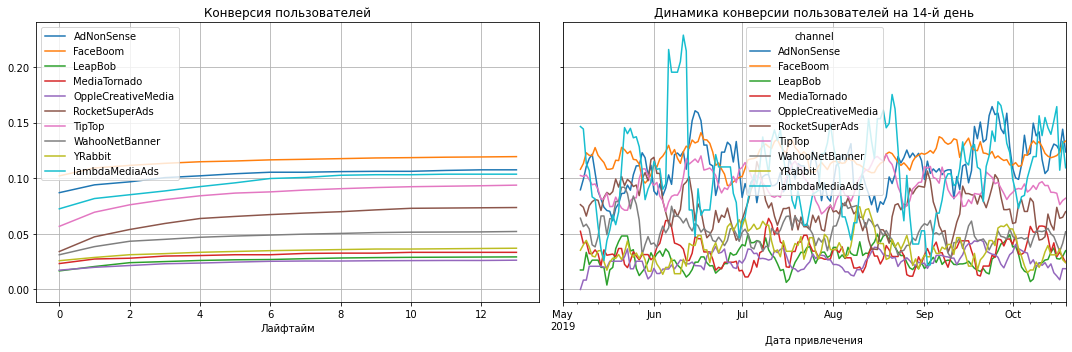

In [58]:
# построение графиков конверсии
# с разбивкой по рекламным каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel'])
  

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 7)

- Показатели конверсии пользователей через каналы `FaceBoom`, `AdNonSense` и `lambdaMediaAds` достаточно высокие. Однако, судя по динамике конверсии пользователей на 14-й день, показатели через канал `lambdaMediaAds` не такие стабильные, как у остальных двух рекламных каналов. Это означает, что фактор сезонности играет тут свою роль;


- Хуже всех показатели конверсии пользователей через каналы `OppleCreativeMedia`, `LeapBob`, `MediaTornado`	и `YRabbit`.

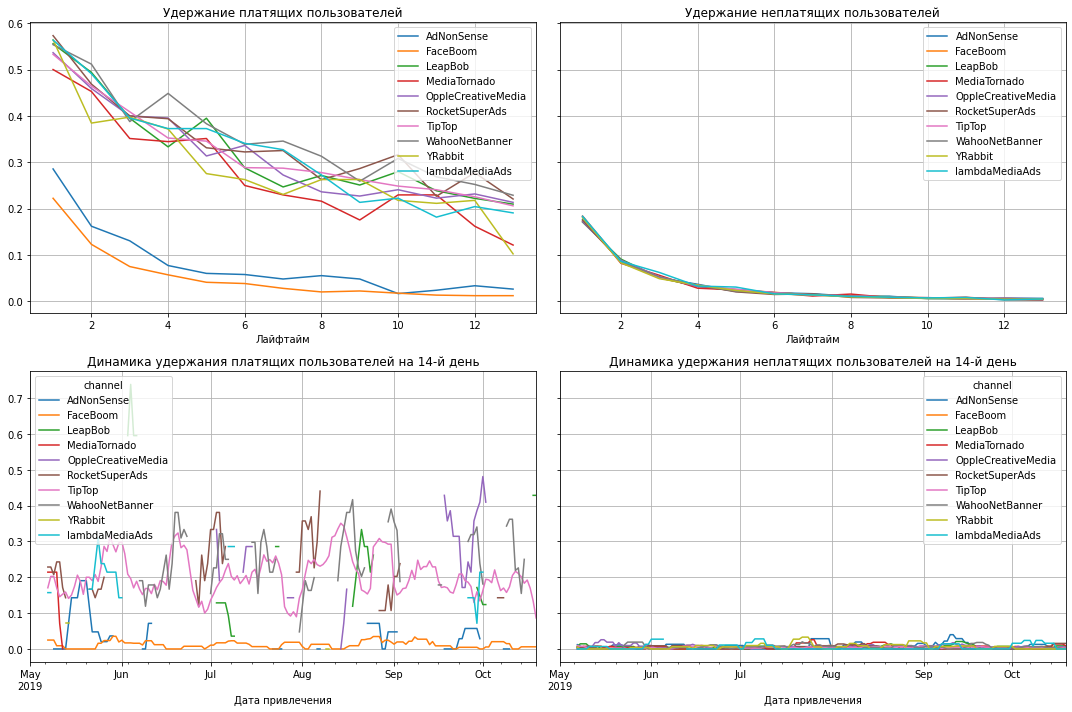

In [59]:
# построение графиков удержания
# с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['channel'])
  

plot_retention(retention_grouped, retention_history, horizon_days, window = 7)

- Хуже всех удержание платящих пользователей  через каналы `AdNonSense` и `FaceBoom`, примерно такие же, как показатели удержания неплатящих пользователей через все каналы. Однако, динамика удержания платящих пользователей на 14-й день через канал `FaceBoom` более стабильная, чем через канал `AdNonSense`, у которого присутствуют колебания;


- Также, как и с разбивкой пользователей по устройствам  и по странам, удержание неплатящих пользователей довольно низкое и, в основном, хуже, чем у платящих.

**Вывод** <a id='intro6'></a>
 

**1.** В целом реклама не окупается, но показатели близки к нужному результату. Если учитывать, что в бизнес-плане заложено, пользователи должны окупаться не позднее чем через две недели после привлечения, то на 14-й день окупаемость не достигает нужных показателей, `ROI` около `80%`.

**2.** Могут снижать окупаемость рекламы:

- устройства `iPhone` и `Mac`;

- страна `США`;

- рекламные каналы `TipTop`, `FaceBoom` и `LeapBob`.

**3.** Проблемы окупаемости могут быть вызваны неравномерным распределением денежных средств на рекламу. Например, в канал `TipTop`, в привлечение пользователей из `США` и с устройств `iPhone` и `Mac` было вложено больше всех средств, но их окупаемость ниже всех остальных.
Также, возможно, что горизонт анализа недостаточен, чтобы привлечённые пользователи окупились, и нужно увеличить его.


**Промежуточные рекомендации для рекламного отдела:**

1. Необходимо обратить внимание на привлечение пользователей `Mac` и `iPhone`. Стоимость их привлечения выше всех остальных пользователей других устройств, а окупаемость на последнем месте. Также следует обратить внимание на пользователей `PC`, затраты на их привлечение наоборот небольшие, а окупаемость высокая;


2. Необходимо обратить внимание на привлечение пользователей из `США`. Здесь также вложения в привлечение довольно высокие, а окупаемость низкая.

# Шаг 6. Выводы <a id='intro7'></a>
- Выделим причины неэффективности привлечения пользователей;
- Сформируем рекомендации для отдела маркетинга для повышения эффективности.

**В процессе исследования мы выявили, что:**

1. Больше всего платящих пользователей приходится из `США`. Общее количество пользователей составляет - `100 002`, а доля `6.90`.  Самое последнее место по общему количеству составляют пользователи из `Германии`, однако по доле платящих, `4.11`, они занимают второе место после `США`;


2. Платящие пользователи больше всего предпочитают пользоваться `Mac`, доля составляет `6.36`, на втором месте `iPhone` - доля `6.21`. Меньше всего платящие пользователи используют `PC` - доля `5.05`. По общему количеству пользователей больше всего популярны `iPhone` - `54 479` и `Android` - `35 032`;


3. Больше всего платящих пользователей пришло из канала `FaceBoom`. Общее количество пользователей составляет - `29 144`, а доля `12.20`. Также доля платящих пользователей больше у каналов `AnNonSense` - `11.34` и `lambdaMediaAds` - `10.47`. Однако, стоит заметить, что, по общему количеству пользователей - `19 561`, канал `TipTop` занимает второе место, но, по доле платящих -  `9.60`, он на четвёртом месте;


4. Самые большие затраты на маркетинг были через канал `TipTop`, стоимость составляет - `54 751.30` и `FaceBoom` -	`32 445.60`. Самые меньшие затраты были через каналы `MediaTornado` - `954.48` и `YRabbit` - `944.22`;


5. Через канал `TipTop` в `октябре` увеличились затраты и достигли более `600` у.е. Также, затраты через данный канал с каждый месяцем поднимались. Через канал `FaceBoom` затраты на протяжении всего периода держались в районе от `100` до `300` у.е. Что примечательно самая высокая цена у данного канала была также в `октябре`; 


6. В общей совокупности самые большие затраты на маркетинг были `3 октября`, сумма составляет - `630` и `28 сентября` - `623`;


7. Средняя стоимость привлечения клиента на одного пользователя составляет `0.7`. Самые догогие каналы по средней стоимости привлечения клиента на одного пользователя это `TipTop` - `2.80`, `FaceBoom` - `1.11` и `AdNonSense` - `1.01`. Меньше всего средняя стоимость у каналов `LeapBob` - `0.21`, `YRabbit` - `0.22` и `MediaTornado` - `0.22`.

 
**Также, в процессе исследования была оценена окупаемость рекламы для привлечения пользователей и рассмотрены 3 важные метрики для анализа бизнеса: `LTV ((«пожизненная ценность» клиента)`, `CAC (стоимость привлечения одного клиента)` и `ROI (окупаемость инвестиций)`. Из этого следует, что:**
- `LTV` достаточно стабилен, значит качество пользователей не ухудшается. Однако, сезонный фактор оказывает на него небольшое влияние, так как есть колебания на `14-й день` на протяжении всего временного периода;


- `CAC` растёт, следовательно затраты на рекламу увеличиваются на протяжении времени;


- `ROI` не превышает красной черты уровня окупаемости, значит реклама не окупается ближе ко `2-ой недели`;


- `ROI` пользователей на `14-ый день` также постепенно снижается до `0.6`. Однако, приблизительно до июля показатель был выше уровня окупаемости, но после стал опускаться.

**Чтобы разобраться в причинах неэффективности привлечения пользователей, мы более подробно рассмотрели `LTV`, `CAC` и `ROI`, а также `удержание` и `конверсию` с разбивкой по определённым признакам, а именно:**

**1. По рекламным каналам.**

- На рекламный канал `TipTop` было потрачено много средств, так как стоимость привлечения пользователей с каждым месяцем растёт. Однако, вложенные средства в рекламу по данному каналу не принесли успехов, окупаемость не достигла должного уровня;


- Реклама, потраченная на привлечение пользователей из рекламных каналов `TipTop`, `FaceBoom`, `LeapBob`, не окупилась;


- По рекламному каналу `YRabbit` в `июле` месяце был высокий подъём, окупаемость пользователей на `14-ый` день была высокой. Также, примерно на протяжении всего периода показатели данного рекламного канала оставались на уровне;


- Показатели конверсии пользователей через каналы `FaceBoom`, `AdNonSense` и `lambdaMediaAds` достаточно высокие. Однако, судя по динамике конверсии пользователей на 14-й день, показатели через канал `lambdaMediaAds` не такие стабильные, как у остальных двух рекламных каналов. Это означает, что фактор сезонности играет тут свою роль;


- Хуже всех показатели конверсии пользователей через каналы `OppleCreativeMedia`, `LeapBob`, `MediaTornado`	и `YRabbit`.


- Хуже всех удержание платящих пользователей  через каналы `AdNonSense` и `FaceBoom`, примерно такие же, как показатели удержания неплатящих пользователей через все каналы. Однако, динамика удержания платящих пользователей на 14-й день через канал `FaceBoom` более стабильная, чем через канал `AdNonSense`, у которого присутствуют колебания.


**2. По странам.**

- Стоимость привлечения пользователей из `США` самая высокая, `CAC` растёт на протяжении всего времени. Однако, потраченные средства на привлечение пользователей из данной страны не дают должного результата, окупаемость не превышает определённой отметки;


- Всех лучше окупается реклама на привлечение пользователей из `Великобритании` и `Германии`;


- Окупаемость пользователей из `США` начала падать с `конца июля`. Можно предположить, что на это могли повлиять какие то внутренние изменения в продукте, неудачный релиз или запуск похожего продукта у конкурентов;


- Cамая высокая конверсия у пользователей из `США`, а самая низкая конверсия у пользователей из `Великобритании`, `Германии` и `Франции`;


- Удержание платящих пользователей из `США` стабильно низкое, сезонный фактор также не влияет. Удержание платящих пользователей из других стран примерно одинаковое.


**3. По устройствам.**

- Стоимость привлечения пользователей по всем устройствам растёт с каждым месяцем. Дороже всех стоимость привлечения пользователей `Mac` и `iPhone`, дешевле всех - пользователей `PC`;


- Затраты на привлечение пользователей `PC` ниже всех, однако только у них общая окупаемость инвестиций выше опредлённой отметки;


- Окупаемость на 14-й день для пользователей всех устройств была на должном уровне до `июня` месяца, после показатели стали снижаться, особенно для пользователей устройств `Mac` и `iPhone`;


- Окупаемость для пользователей устройств `PC`, начиная с `сентября` месяца была ниже определённой отметки, хоть и общий уровень окупаемости на протяжении всех 2-х недель по данному устройству оставался на должном уровне. Также был резкий скачок вниз в плане окупаемости с `конца июля` по `начало августа`. По показателям `LTV` («пожизненная ценность» клиента) тоже наблюдается резкий спад в данный период;

- Конверсия пользователей `Mac`, `iPhone` и `Android` достаточно высокая и без каких то колебаний;


- Конверсия пользователей `PC` на 14-й день с `середины июля` по `конец июля` резко падает. Ранее по показателям LTV («пожизненная ценность» клиента) и ROI (окупаемость инвестиций) мы также заметили подобную закономерность на 14-й день в примерное время;


- Пользователи всех устройств удерживаются примерно одинаково, нет каких то явных лидеров или отстающих;


- Из платящих пользователей лучше всего удерживаются владельцы `PC`, хуже всего владельцы `iPhone` и `Mac`.



**Стоит также отметить, что по всем представленным признакам (рекламный канал, страна, устройство) удержание неплатящих пользователей довольно низкое и, в основном, хуже, чем у платящих.**





**Рекомендации для отдела маркетинга:**

1. Возможно, необходимо пересмотреть распределение бюджета, закладываемого для привлечения пользователей, по рекламным каналам. Стоит обратить внимание на канал `YRabbit`, затраченных средств по привлечению пользователей было использовано по минимуму, а окупаемость самая высокая. Можно присмотреться к каналам `MediaTornado` и `lambdaMediaAds`, на них было потрачено не так много денежных средств, особенно на канал `MediaTornado`, а окупаемость входит в число первых. Следует также пересмотреть бюджет в плане рекламного канала `TipTop`, вложенных средств было потрачено довольно много, больше всех в несколько раз, по сравнению с другими каналами, а окупаемость на последнем месте;  
Также можно обратить внимание на рекламные каналы `FaceBoom` и `AdNonSense`, через данные каналы самое низкое удержание платящих пользователей. Возможно, для пользователей, привлечённых через данные каналы, можно сделать какое то специальное предложение, чтобы заинтересовать их и тем самым повысить число удержаний.


2. В контексте разделения пользователей по странам, можно пересмотреть распределение бюджета. Возможно, стоит меньше денежных средств вкладывать в привлечение пользователей из `США`, так как затраты на привлечение самые высокие и растут с каждым месяцем, а окупаемость на последнем месте. Также можно обратить внимание на привлечение пользователей из `Великобритании` и `Германии`, так как окупаемость по ним самая высокая, возможно, стоит вложить в их привлечение больше средств, чем было ранее.

Если же не уменьшать сумму денежных средств, вкладываемых в привлечение пользователей из `США`, то можно сделать акцент на удержании. Согласно данным, пользователи `США` не совсем долго удерживаются, но количество их целевых действий довольно высокое, поэтому необходимо повысить показатели удержания, чтобы окупаемость стала выше. Для этого можно сделать пользователем данной страны специальное предложение, чтобы, например, после какого то целевого действия, у пользователя появилось желание вновь вернуться;


3. По вопросу разделения пользователей по устройствам можно аналогично пересмотреть распределение бюджета. Возможно, стоит делать меньше вложений в привлечение пользователей `Mac` и `Android`, а больше в пользователей `PC`. Исходя из исследования, вложения по привлечению пользователей `PC` были минимальными, а окупаемость на уровне, что наоборот не скажешь о пользователях `Mac` и `Android`. Здесь денежных средств было потрачено больше, а окупаемость не достигла нужных результатов.